## Feature extraction and manipulation for clustering

In [3]:
from skimage import io
from skimage import feature
from skimage import filters
from skimage.transform import integral_image
import matplotlib.pyplot as plt
import pandas as pd
import os
import numpy as np

In [4]:
#I previously cropped images to the face
source = '/home/gc1569/Capstone/Cropped_Images/'
feature_list = []
name_list = []

def chunks(l, n):
    for i in range(0, len(l), n):
        yield l[i:i+n]

# Resampling function to make arrays the same size
def resample(arr, newLength=1000):
    chunkSize = len(arr)//newLength
    return [np.mean(chunk) for chunk in chunks(arr, chunkSize)][:newLength]


#for each picture, I extract features and store it in a long array of numbers then attach it to a matrix
for i, pic in enumerate([f for f in os.listdir(source) if f.endswith('.jpg')]):
    try:
        imageC = cv2.imread(source + pic)
        image = io.imread(source + pic, as_grey=True)
    except:
        print("Unable to open")
        continue
    prev = 0
    feature_dict = []  
    
    #some features are 1D some 2D so I flatten the arrays and resample them to the same size for the clustering algorithm
#     feature_dict.append(np.array(
#         cv2.calcHist([imageC], [0,1,2], None, [10,10,10], [0, 256, 0, 256, 0, 256])).flatten()) 
    feature_dict.append(resample(np.array(
        feature.local_binary_pattern(image, 10, 10)).flatten()))
    feature_dict.append(resample(np.array(
        feature.corner_fast(image, n=12, threshold=0.15)).flatten()))
    feature_dict.append(resample(np.array(
        feature.shape_index(image, sigma=1, mode='constant', cval=0)).flatten()))
    HX, HY, HZ = feature.hessian_matrix(image, sigma=1, mode='constant', cval=0, order='xy')
    feature_dict.append(resample(np.array(
        feature.hessian_matrix_eigvals(HX, HY, HZ)[0]).flatten()))
    HX, HY, HZ = feature.structure_tensor(image, sigma=1, mode='constant', cval=0)
    feature_dict.append(resample(np.array(
        feature.structure_tensor_eigvals(HX, HY, HZ)[0]).flatten()))
    feature_dict.append(resample(1*np.array(
        feature.canny(image, sigma=1.0, low_threshold=None, high_threshold=None, mask=None, use_quantiles=False)).flatten()))
#     feature_dict.append(resample(np.array(
#         feature.hog(image, feature_vector=True))))
    feature_dict.append(resample(np.array(
        feature.shape_index(image)).flatten()))
#     feature_dict.append(resample(np.array(
#         feature.blob_dog(image)).flatten()))
#     feature_dict.append(resample(np.array(
#         feature.haar_like_feature(integral_image(image), 0, 0, 5, 5, 'type-3-x')).flatten()))
#     censure = feature.CENSURE()
#     censure.detect(image)    
#     feature_dict.append(resample(np.array(
#         censure.keypoints).flatten()))
    
    
    #getting rid of NaNs by forward filling
    arr = np.array([np.concatenate(feature_dict)])
    if (np.count_nonzero(np.isnan(feature_list)) > 0):
        mask = np.isnan(arr)
        idx = np.where(~mask,np.arange(mask.shape[1]),0)
        np.maximum.accumulate(idx,axis=1, out=idx)
        out = arr[np.arange(idx.shape[0])[:,None], idx]
        feature_list.append(np.nan_to_num(out[0]))
    else:
        feature_list.append(np.nan_to_num(arr[0]))
    name_list.append(source + pic)
    
    if (i%50 == 0):
        print('#', end='')

#pickling so that results can be used later
df = pd.DataFrame(feature_list)
df.to_pickle('/home/gc1569/Capstone/Image_Features/featuresflat.pickle')
print('All features extracted and pickled file')

Unable to open
Unable to open
Unable to open
Unable to open
Unable to open
Unable to open
Unable to open
Unable to open
Unable to open
Unable to open
Unable to open
Unable to open
Unable to open
Unable to open
Unable to open
Unable to open
Unable to open
Unable to open
Unable to open
Unable to open
Unable to open
Unable to open
Unable to open
Unable to open
Unable to open
Unable to open
Unable to open
Unable to open
Unable to open
Unable to open
Unable to open
Unable to open
Unable to open
Unable to open
Unable to open
Unable to open
Unable to open
Unable to open
Unable to open
Unable to open
Unable to open
Unable to open
Unable to open
Unable to open
Unable to open
Unable to open
Unable to open
Unable to open
Unable to open
Unable to open
Unable to open
Unable to open
Unable to open
Unable to open
Unable to open
Unable to open
Unable to open
Unable to open
Unable to open
Unable to open
Unable to open
Unable to open
Unable to open
Unable to open
Unable to open
Unable to open
Unable to 

Unable to open
Unable to open
Unable to open
Unable to open
Unable to open
Unable to open
Unable to open
Unable to open
Unable to open
Unable to open
Unable to open
Unable to open
Unable to open
Unable to open
Unable to open
Unable to open
Unable to open
Unable to open
Unable to open
Unable to open
Unable to open
Unable to open
Unable to open
Unable to open
Unable to open
Unable to open
Unable to open
Unable to open
Unable to open
Unable to open
Unable to open
Unable to open
Unable to open
Unable to open
Unable to open
Unable to open
Unable to open
Unable to open
Unable to open
Unable to open
Unable to open
Unable to open
Unable to open
Unable to open
Unable to open
Unable to open
Unable to open
Unable to open
Unable to open
Unable to open
Unable to open
Unable to open
Unable to open
Unable to open
Unable to open
Unable to open
Unable to open
Unable to open
Unable to open
Unable to open
Unable to open
Unable to open
Unable to open
Unable to open
Unable to open
Unable to open
Unable to 

Unable to open
Unable to open
Unable to open
Unable to open
Unable to open
Unable to open
Unable to open
Unable to open
Unable to open
Unable to open
Unable to open
Unable to open
Unable to open
Unable to open
Unable to open
Unable to open
Unable to open
Unable to open
Unable to open
Unable to open
Unable to open
Unable to open
Unable to open
Unable to open
Unable to open
Unable to open
Unable to open
Unable to open
Unable to open
Unable to open
Unable to open
Unable to open
Unable to open
Unable to open
Unable to open
Unable to open
Unable to open
Unable to open
Unable to open
Unable to open
Unable to open
Unable to open
Unable to open
Unable to open
Unable to open
Unable to open
Unable to open
Unable to open
Unable to open
Unable to open
Unable to open
Unable to open
Unable to open
Unable to open
Unable to open
Unable to open
Unable to open
Unable to open
Unable to open
Unable to open
Unable to open
Unable to open
Unable to open
Unable to open
Unable to open
Unable to open
Unable to 

Unable to open
Unable to open
Unable to open
Unable to open
Unable to open
Unable to open
Unable to open
Unable to open
Unable to open
Unable to open
Unable to open
Unable to open
Unable to open
Unable to open
Unable to open
Unable to open
Unable to open
Unable to open
Unable to open
Unable to open
Unable to open
Unable to open
Unable to open
Unable to open
Unable to open
Unable to open
Unable to open
Unable to open
Unable to open
Unable to open
Unable to open
Unable to open
Unable to open
Unable to open
Unable to open
Unable to open
Unable to open
Unable to open
Unable to open
Unable to open
Unable to open
Unable to open
Unable to open
Unable to open
Unable to open
Unable to open
Unable to open
Unable to open
Unable to open
Unable to open
Unable to open
Unable to open
Unable to open
Unable to open
Unable to open
Unable to open
Unable to open
Unable to open
Unable to open
Unable to open
Unable to open
Unable to open
Unable to open
Unable to open
Unable to open
Unable to open
Unable to 

Unable to open
Unable to open
Unable to open
Unable to open
Unable to open
Unable to open
Unable to open
Unable to open
Unable to open
Unable to open
Unable to open
Unable to open
Unable to open
Unable to open
Unable to open
Unable to open
Unable to open
Unable to open
Unable to open
Unable to open
Unable to open
Unable to open
Unable to open
Unable to open
Unable to open
Unable to open
Unable to open
Unable to open
Unable to open
Unable to open
Unable to open
Unable to open
Unable to open
Unable to open
Unable to open
Unable to open
Unable to open
Unable to open
Unable to open
Unable to open
Unable to open
Unable to open
Unable to open
Unable to open
Unable to open
Unable to open
Unable to open
Unable to open
Unable to open
Unable to open
Unable to open
Unable to open
Unable to open
Unable to open
Unable to open
Unable to open
Unable to open
Unable to open
Unable to open
Unable to open
Unable to open
Unable to open
Unable to open
Unable to open
Unable to open
Unable to open
Unable to 

Unable to open
Unable to open
Unable to open
Unable to open
Unable to open
Unable to open
Unable to open
Unable to open
Unable to open
Unable to open
Unable to open
Unable to open
Unable to open
Unable to open
Unable to open
Unable to open
Unable to open
Unable to open
Unable to open
Unable to open
Unable to open
Unable to open
Unable to open
Unable to open
Unable to open
Unable to open
Unable to open
Unable to open
Unable to open
Unable to open
Unable to open
Unable to open
Unable to open
Unable to open
Unable to open
Unable to open
Unable to open
Unable to open
Unable to open
Unable to open
Unable to open
Unable to open
Unable to open
Unable to open
Unable to open
Unable to open
Unable to open
Unable to open
Unable to open
Unable to open
Unable to open
Unable to open
Unable to open
Unable to open
Unable to open
Unable to open
Unable to open
Unable to open
Unable to open
Unable to open
Unable to open
Unable to open
Unable to open
Unable to open
Unable to open
Unable to open
Unable to 

Unable to open
Unable to open
Unable to open
Unable to open
Unable to open
Unable to open
Unable to open
Unable to open
Unable to open
Unable to open
Unable to open
Unable to open
Unable to open
Unable to open
Unable to open
Unable to open
Unable to open
Unable to open
Unable to open
Unable to open
Unable to open
Unable to open
Unable to open
Unable to open
Unable to open
Unable to open
Unable to open
Unable to open
Unable to open
Unable to open
Unable to open
Unable to open
Unable to open
Unable to open
Unable to open
Unable to open
Unable to open
Unable to open
Unable to open
Unable to open
Unable to open
Unable to open
Unable to open
Unable to open
Unable to open
Unable to open
Unable to open
Unable to open
Unable to open
Unable to open
Unable to open
Unable to open
Unable to open
Unable to open
Unable to open
Unable to open
Unable to open
Unable to open
Unable to open
Unable to open
Unable to open
Unable to open
Unable to open
Unable to open
Unable to open
Unable to open
Unable to 

## Dimensionality reduction

In [5]:
df = pd.read_pickle('/home/gc1569/Capstone/Image_Features/featuresflat.pickle')
print(df.shape)
from sklearn.decomposition import PCA
pca = PCA().fit(df)
plt.plot(np.cumsum(pca.explained_variance_ratio_))
plt.xlabel('number of components')
plt.ylabel('cumulative explained variance');
plt.show()

(0, 0)


ValueError: Found array with 0 sample(s) (shape=(0, 0)) while a minimum of 1 is required.

In [253]:
pca = PCA(650)
projected = pca.fit_transform(feature_list) 
projected.shape

(11011, 650)

## Hierarchical clustering and dendogram

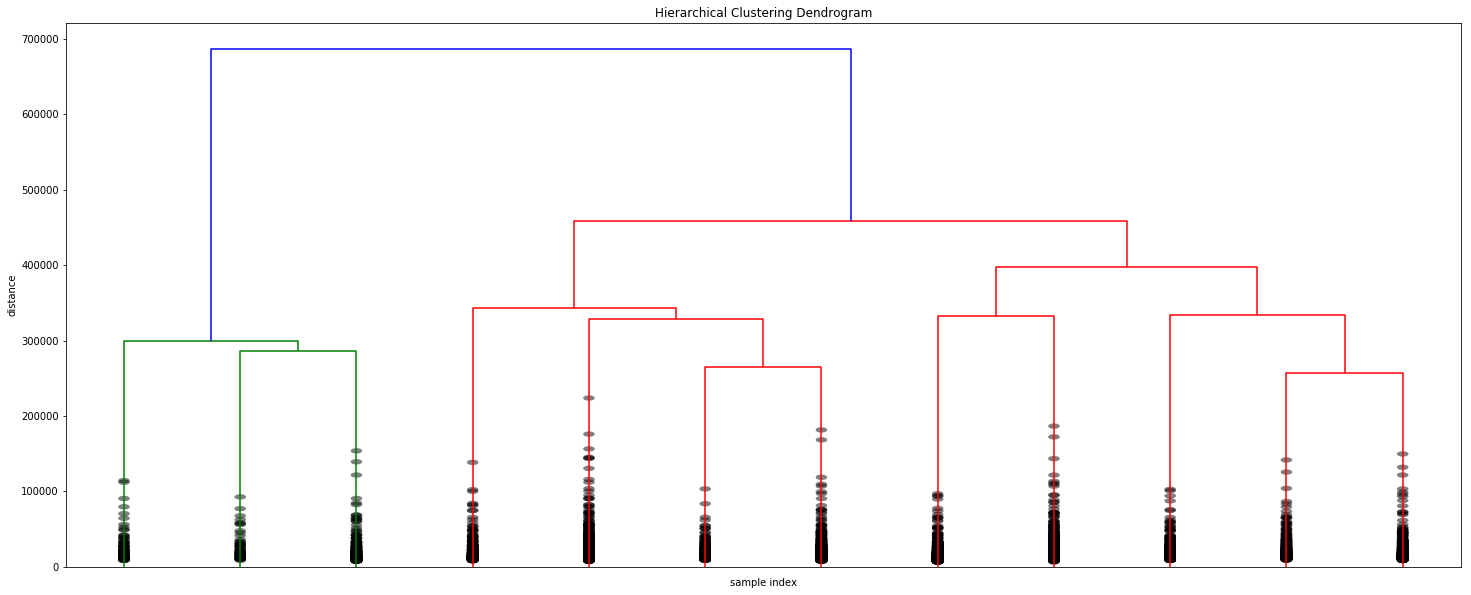

3    4653
2    4208
4    1520
1     630
dtype: int64

In [254]:
from sklearn.cluster import KMeans
from scipy.cluster.hierarchy import dendrogram, linkage
from scipy.cluster.hierarchy import fcluster


Z = linkage(projected, 'ward')
plt.figure(figsize=(25, 10))
plt.title('Hierarchical Clustering Dendrogram')
plt.xlabel('sample index')
plt.ylabel('distance')
dendrogram(
    Z,
    truncate_mode='lastp',  # show only the last p merged clusters
    p=12,  # show only the last p merged clusters
    show_leaf_counts=False,  # otherwise numbers in brackets are counts
    leaf_rotation=90.,  # rotates the x axis labels
    leaf_font_size=8.,  # font size for the x axis labels
    show_contracted=True,
)
plt.show()

no_clusters = 4
clusters = fcluster(Z, no_clusters, criterion='maxclust')
pd.Series(clusters).value_counts()


## Visualizing the clusters by taking a random sample of its contained images

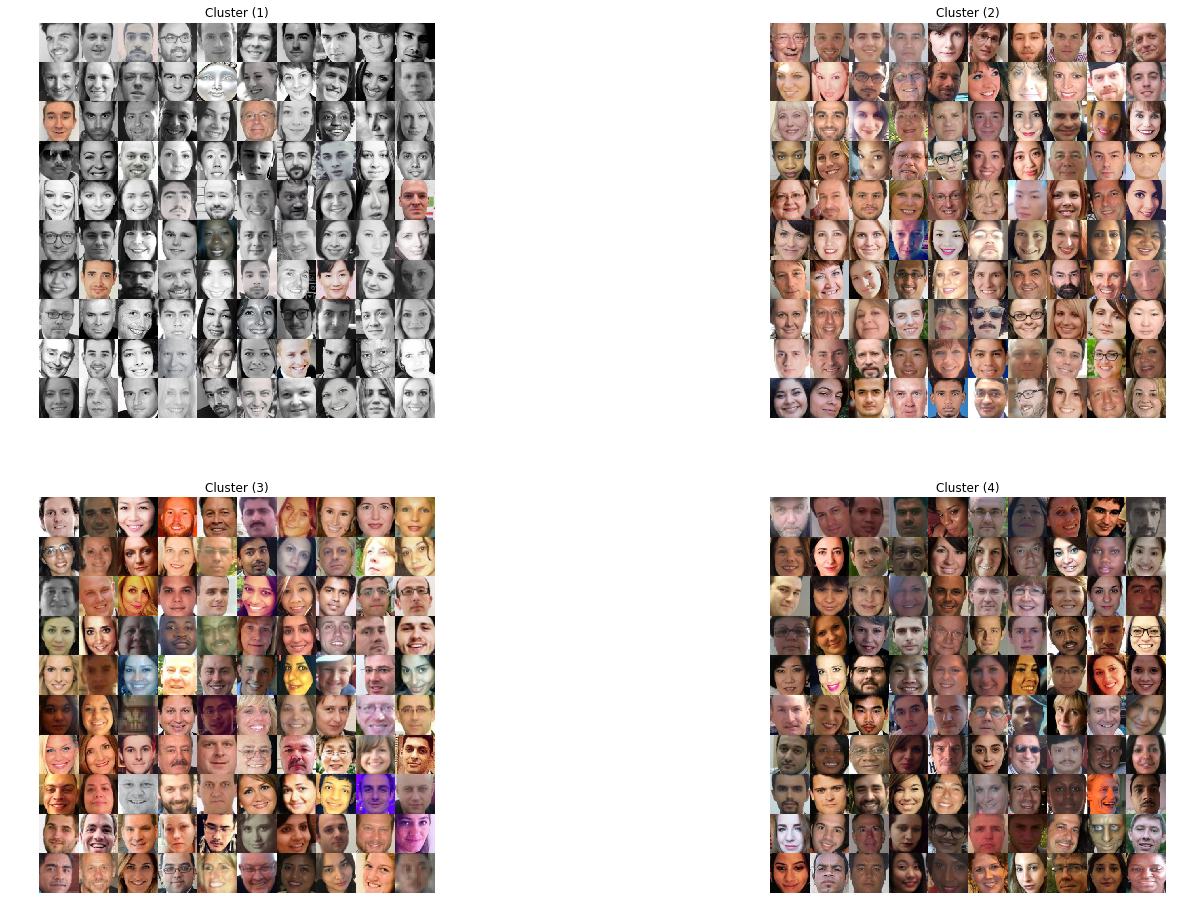

In [255]:
from PIL import Image
import matplotlib.pyplot as plt

def calc_tile(files):
    new_im = Image.new('RGB', (1000,1000), (100,100,100))
    index = 0
    for i in range(0,1000,100):
        for j in range(0,1000,100):
            try:
                image = Image.open(files[index])
                
            except:
                break
            width  = image.size[0]
            height = image.size[1]

            aspect = width / float(height)

            ideal_width = 100
            ideal_height = 100

            ideal_aspect = ideal_width / float(ideal_height)

            if aspect > ideal_aspect:
                # Then crop the left and right edges:
                new_width = int(ideal_aspect * height)
                offset = (width - new_width) / 2
                resize = (offset, 0, width - offset, height)
            else:
                # ... crop the top and bottom:
                new_height = int(width / ideal_aspect)
                offset = (height - new_height) / 2
                resize = (0, offset, width, height - offset)

            thumb = image.crop(resize).resize((ideal_width, ideal_height), Image.ANTIALIAS)
            new_im.paste(thumb, (i,j))
            index += 1
    return new_im

images = []
cols = 2
for i in range(1, no_clusters+1):
    vis = []
    for ind, k in enumerate(clusters):
        if (k == i): 
            vis.append(name_list[ind])
    images.append(calc_tile(vis))    


n_images = len(images)
titles = ['Cluster (%d)' % i for i in range(1,n_images + 1)]
fig = plt.figure()
for n, (image, title) in enumerate(zip(images, titles)):
    a = fig.add_subplot(cols, np.ceil(n_images/float(cols)), n + 1)
    plt.imshow(image)
    a.set_title(title)
    plt.axis('off')
fig.set_size_inches(np.array(fig.get_size_inches()) * n_images)
plt.show()